# 2022 NZMSA Data Science Submission.

In [46]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Exploratory Data Analysis.

In [23]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [24]:
# Dataset Information:
# The dataset weather-data.csv is obtained from IOWA Environmental Mesonet - Iowa State University.

# Columns for this dataset:

# station: Acronym for the place of data capture.
# valid: Date and time of capture.
# tmpc: Temperature of the environment in celsius.
# dwpc: Temperature of the dew point in the environment in celsius.
# relh: Relative humidity of the environment in percentage.
# sknt: Wind Speed in knots.
# gust: Wind Gust in knots.
# peak_wind_drct: Peak Wind Gust Direction (from PK WND METAR remark). (deg).

dataset.describe() 

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [25]:
#checking for null-values. all data is non-null which is good

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

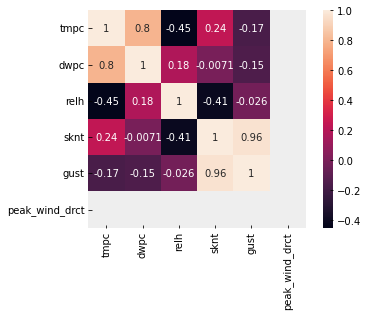

In [26]:
#Correlation plot between all variables of interest.
#Values high positive or negative values close to 1 have a strong correlation.
#We see from this data that there is a strong replationship between
#dwpc and tmpc (temperature of the dew point and temperature of the environment), but not as much for the other variables.
#also a very strong relationship between wind speed in knots and wind gust in knots
sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\st140\AppData\Local\Temp/ipykernel_13384/3490075948.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


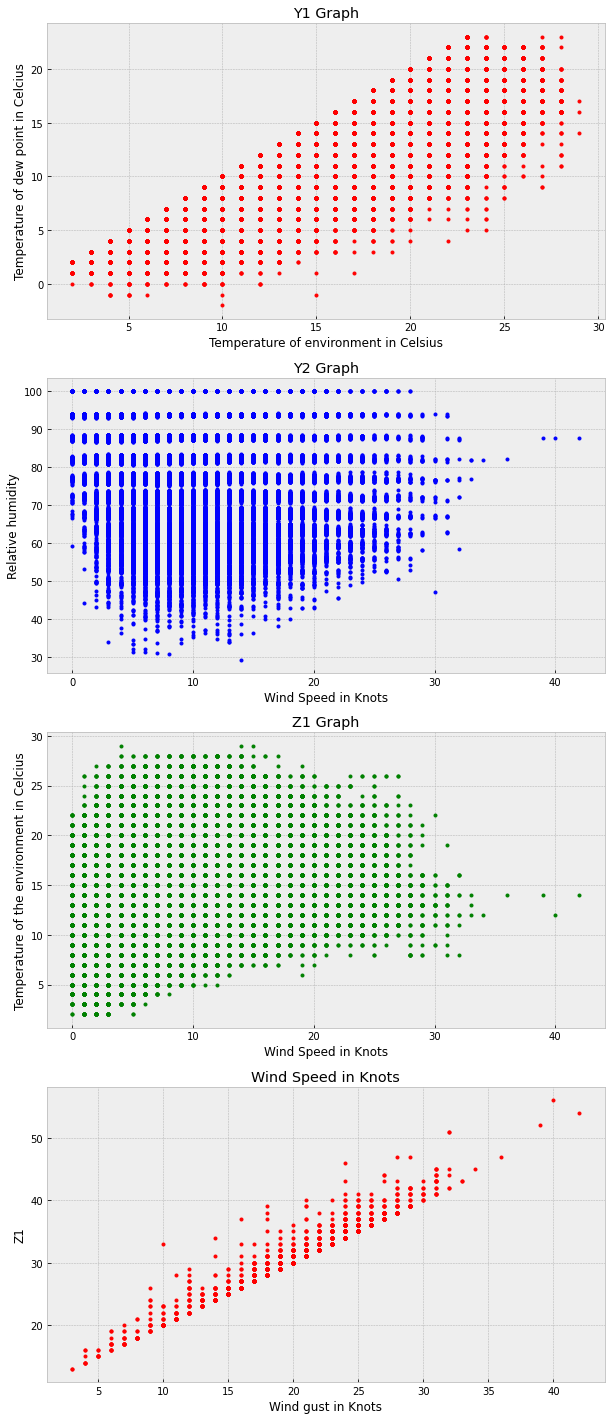

In [51]:
# fig = plt.figure()

# plt.plot(dataset['tmpc'], dataset['dwpc'], 'r.')

# plt.xlabel('tmpc')
# plt.ylabel('dwpc')
# plt.title('twpc vs dwpc')
# plt.show()

plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)


ax1.plot(dataset["tmpc"], dataset["dwpc"], "r.")
ax1.set_title("Y1 Graph")
ax1.set_xlabel("Temperature of environment in Celsius")
ax1.set_ylabel("Temperature of dew point in Celcius")

ax2.plot(dataset["sknt"], dataset["relh"], "b.")
ax2.set_title("Y2 Graph")
ax2.set_xlabel("Wind Speed in Knots")
ax2.set_ylabel("Relative humidity")

ax3.plot(dataset["sknt"], dataset["tmpc"], "g.")
ax3.set_title("Z1 Graph")
ax3.set_xlabel("Wind Speed in Knots")
ax3.set_ylabel("Temperature of the environment in Celcius")

ax4.plot(dataset["sknt"], dataset["gust"], "r.")
ax4.set_title("Wind Speed in Knots")
ax4.set_xlabel("Wind gust in Knots")
ax4.set_ylabel("Z1")

fig.set_size_inches(10,25)

fig.show()


# Data Processing

In [47]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

dataset.head()


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [71]:
#dropping all empty columns

dataset2 = dataset.drop(columns=["valid", "peak_wind_drct", "gust"])
dataset2.head()

,station,tmpc,dwpc,relh,sknt
0,NZAA,21.0,11.0,52.77,15.0
1,NZAA,21.0,10.0,49.37,16.0
2,NZAA,21.0,12.0,56.38,16.0
3,NZAA,21.0,13.0,60.21,16.0
4,NZAA,21.0,12.0,56.38,16.0


Text(0, 0.5, 'Temperature of dew point in Celcius')

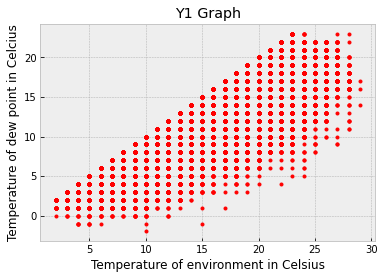

In [107]:
#We want to know the relationship between env. temp and dew point temp.
#It is something affected by relative humiditiy, so we will try keep it constant
#We will do this by filtering the data to keep humidity between 45 and 50
dataset3 = dataset[(dataset["relh"]>45) & (dataset["relh"]<50)]
dataset3 = dataset.loc[:,["tmpc","dwpc"]]

plt.style.use("bmh")
fig, (ax1) = plt.subplots(nrows=1, ncols=1, squeeze=True)

ax1.plot(dataset3["tmpc"], dataset3["dwpc"], "r.")
ax1.set_title("Y1 Graph")
ax1.set_xlabel("Temperature of environment in Celsius")
ax1.set_ylabel("Temperature of dew point in Celcius")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset3[["tmpc", "dwpc"]], dataset3["tan_x"], test_size=0.2)

# Data Modelling

In [90]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.
import pandas as pd

# Just one of the models capable of modelling our dataset.
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



In [103]:
dataset3.info()

X, y = make_regression(n_samples=10000, n_features=10, noise=100, random_state=42)

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(trainX, trainY)

model.score(testX, testY)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   dwpc    103678 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


0.7075262702046181

In [98]:
model.predict([[1,1,1,2,3,2,1,4,5,3]])

array([772.19743505])

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.